<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/lstm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
df=pd.read_csv("TSLA.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,18.762667,19.500000,18.576668,19.369333,19.369333,150231000
1,2018-09-13,19.201332,19.666668,19.011999,19.297333,19.297333,95104500
2,2018-09-14,19.250668,19.822001,19.101334,19.680000,19.680000,101484000
3,2018-09-17,19.336000,20.058001,19.208668,19.656000,19.656000,103314000
4,2018-09-18,19.779333,20.176001,18.366667,18.997334,18.997334,248212500
5,2018-09-19,18.700666,20.000000,18.700001,19.934668,19.934668,124423500
6,2018-09-20,20.237333,20.398666,19.555332,19.888666,19.888666,110241000
7,2018-09-21,19.846666,20.038668,19.691334,19.940001,19.940001,75757500
8,2018-09-24,19.898666,20.200001,19.572001,19.978666,19.978666,72645000
9,2018-09-25,20.000000,20.306667,19.766666,20.066000,20.066000,67225500


<Axes: >

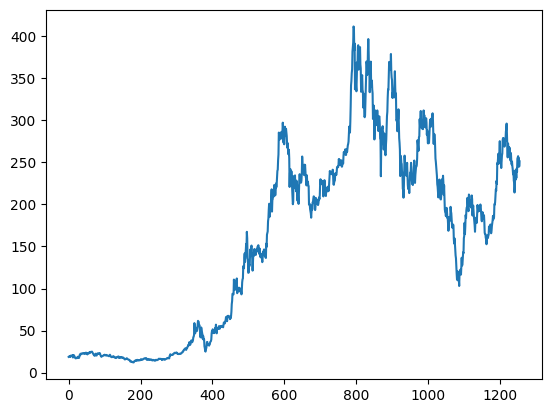

In [44]:
df['Open'].plot()

In [2]:
training = df.iloc[:800, 1:2].values
testing = df.iloc[800:, 1:2].values

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

In [5]:
x_train = []
y_train = []
for iter in range(60, 800):
    x_train.append(training_scaled[iter-60:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 12s 114ms/step - loss: 0.0329
Epoch 2/100
24/24 [==============================] - 6s 266ms/step - loss: 0.0063
Epoch 3/100
24/24 [==============================] - 4s 167ms/step - loss: 0.0053
Epoch 4/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0041
Epoch 5/100
24/24 [==============================] - 3s 121ms/step - loss: 0.0034
Epoch 6/100
24/24 [==============================] - 7s 287ms/step - loss: 0.0035
Epoch 7/100
24/24 [==============================] - 6s 233ms/step - loss: 0.0044
Epoch 8/100
24/24 [==============================] - 7s 298ms/step - loss: 0.0042
Epoch 9/100
24/24 [==============================] - 4s 153ms/step - loss: 0.0034
Epoch 10/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0031
Epoch 11/100
24/24 [==============================] - 4s 169ms/step - loss: 0.0029
Epoch 12/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0031
Epoch 13/100

In [32]:
print(algo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [17]:
'''data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis = 0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1,1)
total_input = sc.transform(total_input)
x_test = []
for iter in range(60, 519):
    x_test.append(total_input[iter-60:iter, 0])
print(len(x_test[0]))
x_test = np.array(x_test)
print(x_test[0])
x_test.shape'''

60
[0.53967234 0.54183392 0.56289902 0.55985278 0.56092105 0.55815855
 0.5662708  0.58152712 0.58242848 0.58277901 0.58090118 0.58736929
 0.60537978 0.59856118 0.60372728 0.58754454 0.58951418 0.59154223
 0.59807709 0.60168253 0.5828291  0.58302104 0.5903154  0.59988818
 0.59228504 0.61501097 0.62676202 0.62058601 0.62158759 0.61941764
 0.63452374 0.62475903 0.61758153 0.62530986 0.63428167 0.62713757
 0.63822095 0.64618302 0.65037261 0.657258   0.68066832 0.70215077
 0.69198544 0.684182   0.71714836 0.76307595 0.8249693  0.8374632
 0.86137424 0.87268295 0.92537908 0.93736387 0.95236147 1.
 0.99465029 0.92937681 0.94924848 0.81305138 0.89013427 0.84400635]


<ipython-input-17-2b70c4807e31>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array(x_test)


(459,)

In [26]:
"""data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis=0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []

# Modify the loop to create a 2D array
for iter in range(60, 519):
    x_test.append(list(total_input[iter-60:iter, 0]))

# Convert x_test to a NumPy array
x_test = np.array(x_test)

# Reshape x_test to have the shape (459, 60)
x_test = x_test.reshape((x_test.shape[0], 60))

print(x_test.shape)  # Should print (459, 60)"""


<ipython-input-26-3f51e2af80ac>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array(x_test)


ValueError: ignored

In [27]:
data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis=0)
total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []

# Calculate the maximum number of sequences of length 60 that can be created
max_sequences = len(total_input) - 60 + 1

# Modify the loop to create a 2D array
for iter in range(max_sequences):
    x_test.append(total_input[iter:iter+60, 0])

# Convert x_test to a NumPy array
x_test = np.array(x_test)

print(x_test.shape)  # Should print (max_sequences, 60)


(457, 60)


In [41]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(457, 60, 1)
15/15 [==============================] - 0s 32ms/step
(457, 1)


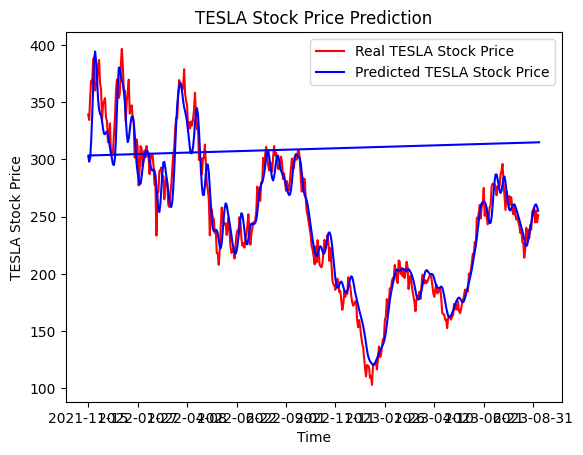

In [43]:
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[799:, 'Date'],predicted_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()
